# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of analyzing and summarizing the main characteristics of a data set. It is a crucial step in the data science process that helps to gain a better understanding of the data and identify any potential issues or problems. During the EDA process, one may use various techniques such as visualizations, statistical analysis, and data cleaning to explore the data and uncover insights.


E-commerce is experiencing exponential growth, with online sales accounting for a significant portion of the overall retail market. Retailers who fail to embrace e-commerce may face a decline in business as customers increasingly turn to online shopping.
There are numerous advantages to retailing online, such as:

- Easy market entry, as platforms like eBay and Amazon allow for the creation of an online shop in a matter of minutes.
- Reduced overhead costs as it eliminates the need for physical retail spaces and customer-facing staff, allowing for more investment in marketing and customer experience.
- The potential for rapid growth, as the internet removes traditional barriers to retail expansion.
- The ability to expand your market beyond local customers with the use of online marketing and offering the website in different languages.
- The ability to gain insights into customer needs and preferences through website analytics tools and targeted online marketing.

In the case of the ecommerce dataset, the EDA would focus on understanding the following aspects:

- Distribution of events and which events are more frequent
- Products characteristics, such as category and department distributions
- Customers demographics and purchase patterns
- Sessions behavior and durations
- Identifying any missing or duplicate values, and any other issues with the data structure.

Once these general insights are obtained, then we can use these insights to form a more specific research questions.

EDA is a crucial step that helps to gain understanding of the data and prepare it for modeling or further analysis.

### Data Source

Source of data: https://www.kaggle.com/datasets/carrie1/ecommerce-data The dataset is downloaded from <a href="kaggle.com">Kaggle.com</a>, Kaggle is a platform that hosts a variety of datasets, competitions, and resources for data science and machine learning. Many organizations and individuals contribute datasets to Kaggle in order to share them with the broader data science community. This dataset contains information on all transactions that took place between December 1, 2010 and September 12, 2011 for a UK-based online retail company that specializes in unique gifts for all occasions. The company operates exclusively online and primarily sells to wholesalers. The data covers a transnational scope.

### Important libraries

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
color = sns.color_palette()
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:.2f}'.format

### Reading dataset into dataframe

Using the pandas library in Python, the data from a csv file is loaded into a DataFrame to facilitate further manipulation and analysis to identify important factors in decision making.

In [2]:
dataf = pd.read_csv("data.csv", encoding='latin1')
dataf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom


### A look on the dataset

In [3]:
dataf.shape

(541909, 8)

In [4]:
dataf.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
# Data duplication
dataf.duplicated(keep=False).sum()

10147

In [6]:
# Missing Values
dataf.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Unique Values
dataf.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [8]:
# Columns info
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


- The data has 541909 rows and 8 columns
- However, the data type of the invoice date column is an object instead of datetime.
- Additionally, the customer ID column has a float data type, which is unusual.
- The dataset comprises of customers from 38 distinct countries which is noteworthy.
- However, the customer ID column has a significant number of missing values, which raises questions.

In [9]:
missing_percentage = dataf.isnull().sum() / dataf.shape[0] * 100
print("Percentage of missing values")
print(missing_percentage.sort_values(ascending=False))


Percentage of missing values
CustomerID    24.93
Description    0.27
InvoiceNo      0.00
StockCode      0.00
Quantity       0.00
InvoiceDate    0.00
UnitPrice      0.00
Country        0.00
dtype: float64


- Data loss can happen due to a wide range of reasons, including human error in data entry, technical malfunctions, file deletion and more. Almost every dataset has some missing values.
- This particular dataset has an unusually high percentage of missing Customer Ids, almost 25%. It's peculiar as each transaction should have a linked customer ID.

### Data Preprocessing and Cleaning for further Analysis


In this dataset, the column containing the descriptions of the product/transaction will be transformed to lowercase letters.

In [10]:
dataf['Description']=dataf.Description.str.lower()

In [11]:
dataf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850.00,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.00,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.00,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,12/1/2010 8:26,3.39,17850.00,United Kingdom


To continue the analysis, the rows with missing values will be removed from the data set, and a new DataFrame named 'df_n' will be created by referencing the cleaned data.

In [12]:
df_n = dataf.dropna()

In [13]:
#checking if there are missing values in the new dataframe
df_n.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


At this stage, the DataFrame has been cleared of any missing values.

In [15]:
df_n.duplicated().sum()

5225

The dataset contains 5225 duplicate transactions that will be removed to ensure accuracy of the analysis.

In [16]:
df_n.drop_duplicates(inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_13000\2666465231.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n.drop_duplicates(inplace=True)


In [17]:
df_n.duplicated().sum()

0

The following step in the analysis is to convert the 'customer_id' column to the integer data type (int) from a float data type, as customer IDs are numerical and should not have decimal points.

In [18]:
df_n['CustomerID']=df_n.CustomerID.astype('int64')

C:\Users\pc\AppData\Local\Temp\ipykernel_13000\2652109009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n['CustomerID']=df_n.CustomerID.astype('int64')


In [19]:
df_n = df_n[df_n.Quantity > 0]
df_n = df_n[df_n.UnitPrice >= 0]

df_n['AmountSpent'] = df_n['Quantity'] * df_n['UnitPrice']
# re-arrange all columns for simple reference
df_n = df_n[['InvoiceNo','InvoiceDate','StockCode','Description','Quantity','UnitPrice','AmountSpent','CustomerID','Country']]
df_n['InvoiceDate']=pd.to_datetime(df_n.InvoiceDate, format='%m/%d/%Y %H:%M')
df_n.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,AmountSpent,CustomerID,Country
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


### Exploratory Data Analysis (EDA)

**How many orders placed by the customers?**

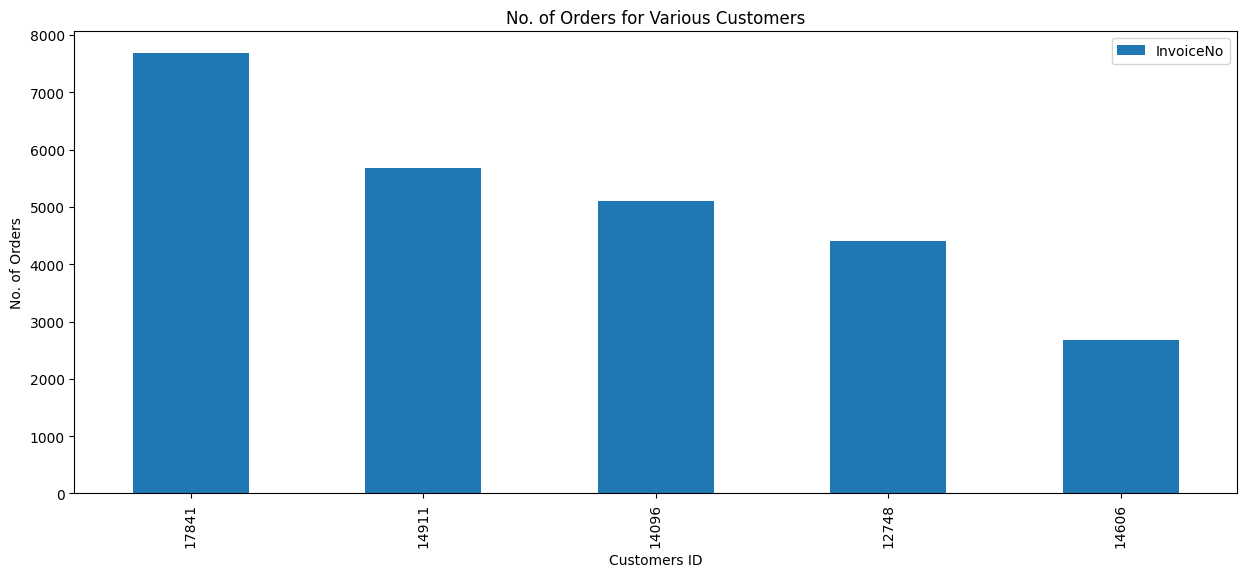

In [20]:
orders = df_n.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

orders = orders.sort_values(by='InvoiceNo', ascending=False).head()
orders.CustomerID = orders.CustomerID.astype('str')
ax = orders.plot(kind='bar',x='CustomerID', y="InvoiceNo",color=color[0],figsize=(15,6))
ax.set_xticklabels(orders.CustomerID)
plt.xlabel('Customers ID')
plt.ylabel('No. of Orders')
plt.title('No. of Orders for Various Customers')
plt.show()

We will now examine the specifics of the countries where the majority of orders originated.

In [32]:
print(df_n[['InvoiceNo','Country']].groupby('Country').count().sort_values("InvoiceNo",ascending = False))

                      InvoiceNo
Country                        
United Kingdom           349227
Germany                    9027
France                     8327
EIRE                       7228
Spain                      2480
Netherlands                2363
Belgium                    2031
Switzerland                1842
Portugal                   1453
Australia                  1184
Norway                     1072
Italy                       758
Channel Islands             747
Finland                     685
Cyprus                      603
Sweden                      450
Austria                     398
Denmark                     380
Poland                      330
Japan                       321
Israel                      245
Unspecified                 241
Singapore                   222
Iceland                     182
USA                         179
Canada                      151
Greece                      145
Malta                       112
United Arab Emirates         68
European

Generating a pie chart to enhance the data visualization.

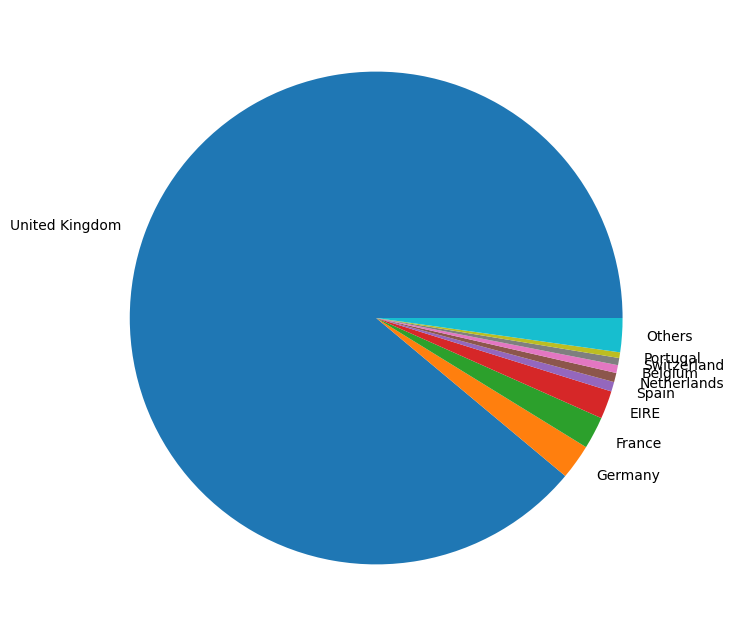

In [33]:
# Creating dataset 
countries = ['United Kingdom', 'Germany','France','EIRE','Spain','Netherlands', 'Belgium','Switzerland', 'Portugal', 'Others',]
invoice_num = [349227, 9027, 8327, 7228, 2480, 2363, 2031, 1842, 1453, 8754]
# Creating plot 
fig = plt.figure(figsize =(12, 8)) 
plt.pie(invoice_num, labels = countries) 
  
# show plot 
plt.show() 

We observe that the majority of the orders in the dataset are from the UK.

<AxesSubplot: >

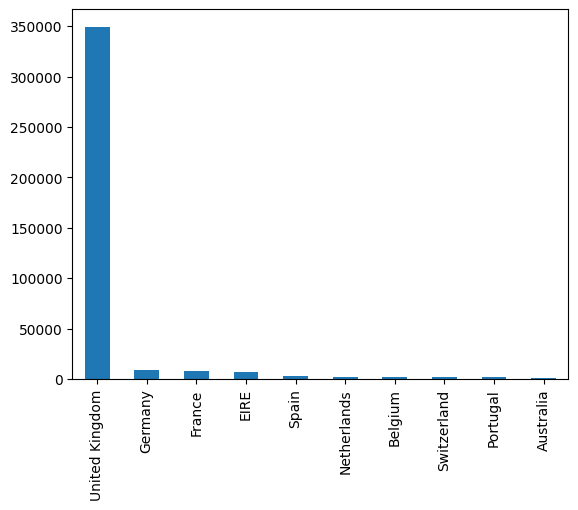

In [34]:
df_n['Country'].value_counts().head(10).plot(kind='bar')

No of Orders per Country visualizing using World Map

In [64]:
import folium

temp = df_n[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()

data = dict(zip(countries.index, countries))

map = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data='world-countries.json',
    name='choropleth',
    data=data,
    key_on='feature.id',
    columns=['Country', 'Count'],
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Number of orders per country'
).add_to(map)

map.save("orders_map.html")
map

**Observing TOP Five High No. of Orders**

In [21]:
print('The TOP five customers with high number of orders...')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP five customers with high number of orders...


,CustomerID,Country,InvoiceNo
4019,17841,United Kingdom,7676
1888,14911,EIRE,5672
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4413
1670,14606,United Kingdom,2677


**What is the total amount of money spent by customers?**

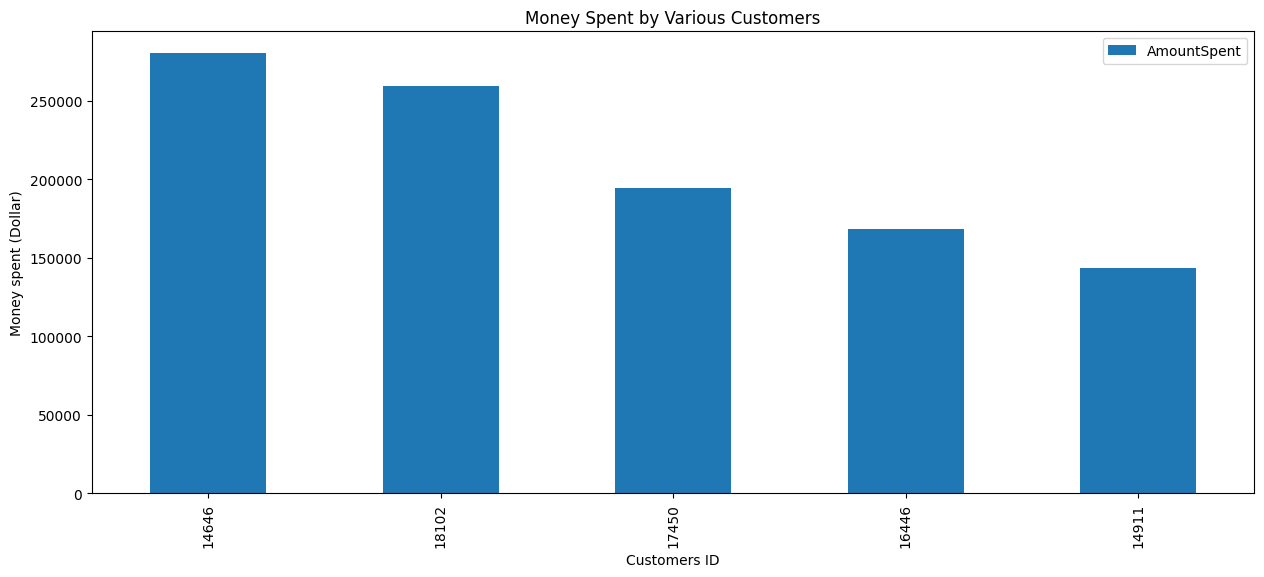

In [22]:
money_Sp = df_n.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum()

money_Sp = money_Sp.sort_values(by='AmountSpent', ascending=False).head()
money_Sp.CustomerID = money_Sp.CustomerID.astype('str')
ax = money_Sp.plot(kind='bar',x='CustomerID', y="AmountSpent",color=color[0],figsize=(15,6))
ax.set_xticklabels(money_Sp.CustomerID)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent by Various Customers')

ax.ticklabel_format(useOffset=False, style='plain', axis='y') # Used to prevent exponential notation in y-axis ticks

plt.show()

**Observe top five highest money utilizers**

In [23]:
print('The Top five customers with highest expenditure...')
print(money_Sp.sort_values(by='AmountSpent', ascending=False).head())

The Top five customers with highest expenditure...
     CustomerID         Country  AmountSpent
1698      14646     Netherlands    280206.02
4210      18102  United Kingdom    259657.30
3737      17450  United Kingdom    194390.79
3017      16446  United Kingdom    168472.50
1888      14911            EIRE    143711.17


**Wordcloud Visualization of Product names**

Creating a word cloud visualization can be useful for identifying patterns and trends in the names of products that are being sold. For example, if a company is selling a large number of products with similar names, such as "Blue T-Shirt" or "Green T-Shirt," a word cloud visualization can quickly reveal this pattern. 

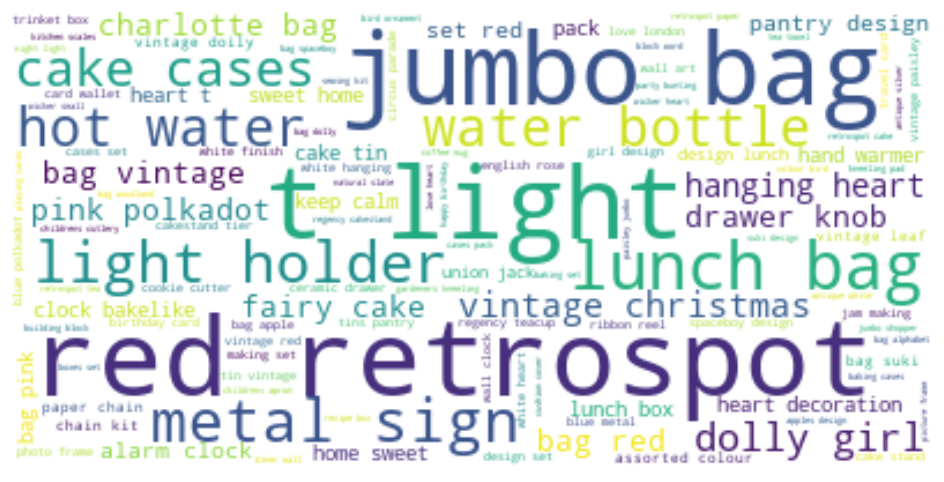

In [70]:
from wordcloud import WordCloud, STOPWORDS 

text = " ".join(review for review in df_n.Description)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Which description was most frequently used?

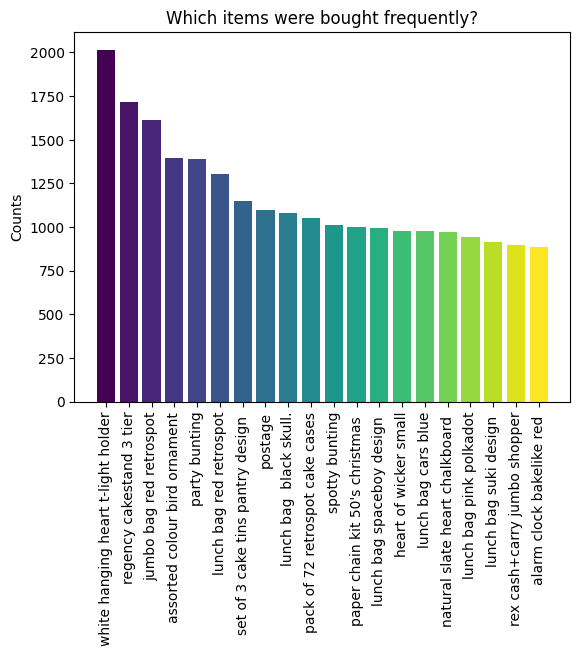

In [50]:
items = df_n['Description'].value_counts().head()
item_cnts = df_n['Description'].value_counts().sort_values(ascending=False).head(20)
plt.bar(item_cnts.index, item_cnts.values, color=plt.cm.viridis(np.linspace(0,1,len(item_cnts.index))))
plt.ylabel("Counts")
plt.title("Which items were bought frequently?")
plt.xticks(rotation=90)
plt.show()

Is the company's performance showing an upward or downward trend over time? The performance can be evaluated in various ways, in this case, we will be assessing it through the following metrics:

- Increase or decrease in revenue generated through sales
- Increase or decrease in the quantity of sales
- Increase or decrease in the number of customers.

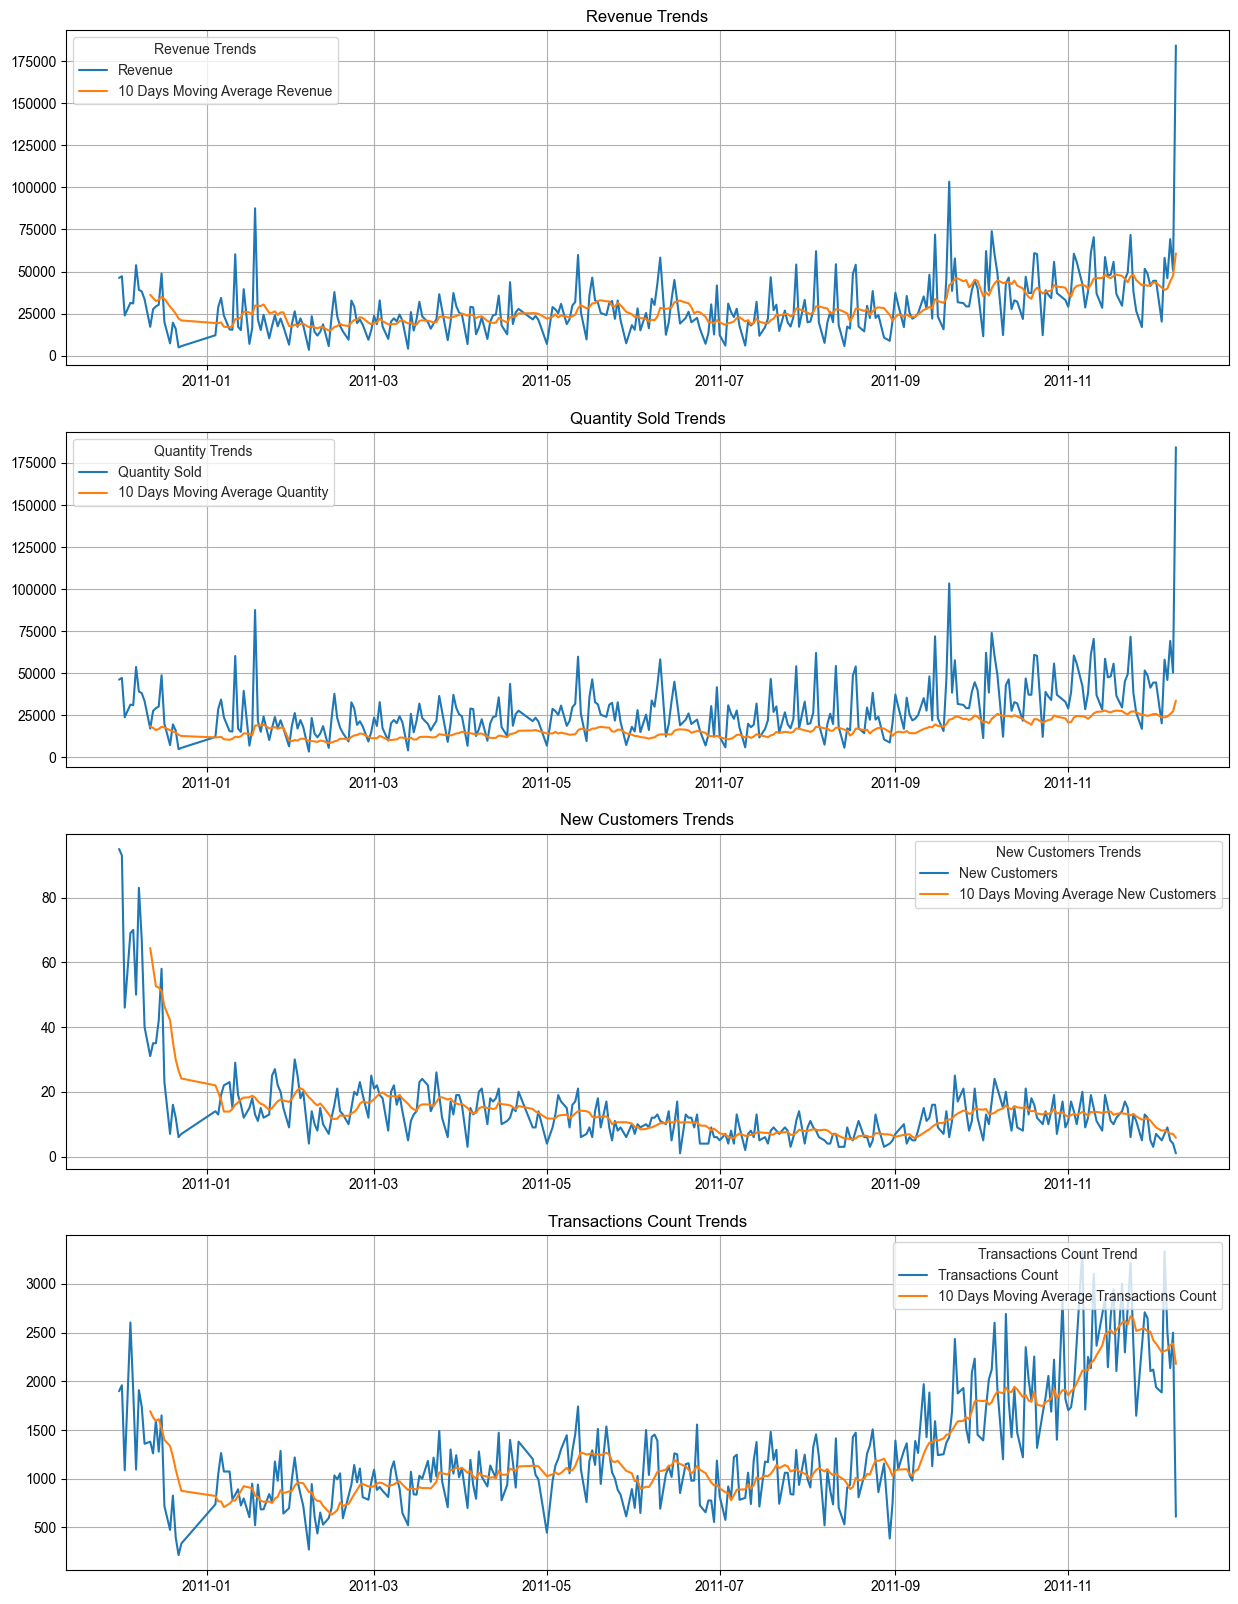

In [51]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,20))
ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

df_n["TotalPrice"] = df_n["UnitPrice"] * df_n["Quantity"]
rev = df_n[df_n['TotalPrice']>=0]
rev['TransactionsCount'] = 1
rev = rev.groupby(rev['InvoiceDate'].dt.date).agg({'TotalPrice':'sum',
                                                  'Quantity': 'sum',
                                                  'CustomerID': 'count',
                                                  'TransactionsCount':'sum'})
rev['10 Days Moving Average Revenue'] = rev['TotalPrice'].rolling(10).mean()
rev['10 Days Moving Average Quantity'] = rev['Quantity'].rolling(10).mean()
rev['10 Days Moving Transactions Count'] = rev['TransactionsCount'].rolling(10).mean()
cust = df_n.groupby('CustomerID').first().reset_index()[['CustomerID','InvoiceDate']]
cust = cust.groupby(cust.InvoiceDate.dt.date).agg({'CustomerID':'count'})
cust['10 Days Moving Average Quantity'] = cust['CustomerID'].rolling(10).mean()

sns.set_style("whitegrid")
rev[['TotalPrice','10 Days Moving Average Revenue']].plot(ax=ax1, linewidth=1.5, legend=False)
ax1.legend(title='Revenue Trends', loc='upper left', labels=['Revenue', '10 Days Moving Average Revenue'])
ax1.set_title('Revenue Trends')
ax1.set_xlabel('')

rev[['TotalPrice','10 Days Moving Average Quantity']].plot(ax=ax2, linewidth=1.5)
ax2.legend(title='Quantity Trends', loc='upper left', labels=['Quantity Sold', '10 Days Moving Average Quantity'])
ax2.set_title('Quantity Sold Trends')
ax2.set_xlabel('')

cust.plot(ax=ax3, linewidth=1.5)
ax3.legend(title='New Customers Trends', loc='upper right', labels=['New Customers', '10 Days Moving Average New Customers'])
ax3.set_title('New Customers Trends')
ax3.set_xlabel('')

rev[['TransactionsCount','10 Days Moving Transactions Count']].plot(ax=ax4, linewidth=1.5)
ax4.legend(title='Transactions Count Trend', loc='upper right', labels=['Transactions Count', '10 Days Moving Average Transactions Count'])
ax4.set_title('Transactions Count Trends')
ax4.set_xlabel('')

plt.show()


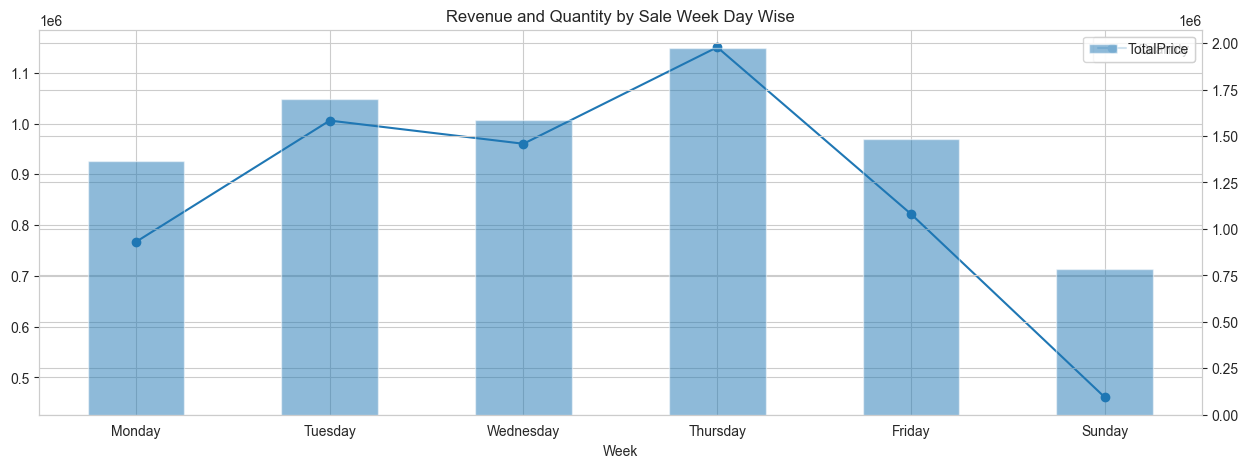

In [61]:
import calendar
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15,5))
sns.set_style("whitegrid")

week = df_n[df_n['TotalPrice']>=0][['InvoiceDate','TotalPrice','Quantity']]
week = week.groupby(week['InvoiceDate'].dt.weekday)[['TotalPrice','Quantity']].sum()
week = week.reset_index()
week['Week'] = week['InvoiceDate'].apply(lambda x: calendar.day_name[x])

week.plot(x='Week', y='Quantity', marker='o', ax=ax, kind='line')
ax2 = ax.twinx()
week.plot(x='Week', y='TotalPrice', alpha=0.5, ax=ax2, kind='bar')
ax.set_title('Revenue and Quantity by Sale Week Day Wise')

plt.show()


### Findout patterns for No. of Orders

**No of orders per month**

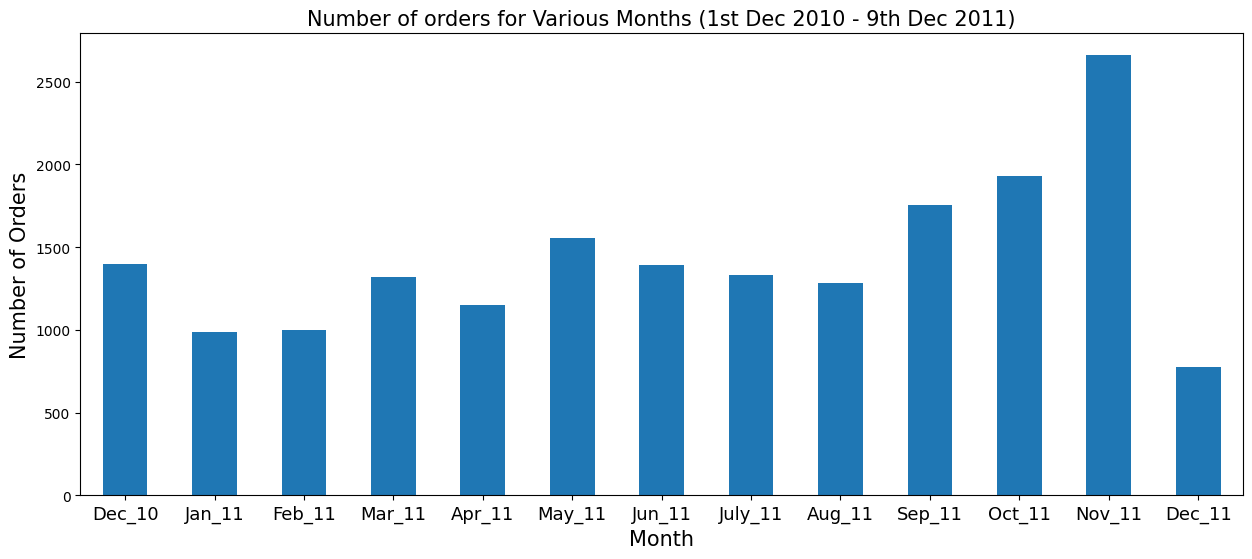

In [24]:
df_n['month_year'] = df_n['InvoiceDate'].dt.to_period('M')
ax = df_n.groupby('InvoiceNo')['month_year'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for Various Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

### Findout patterns for Unit Price

In [25]:
df_n.UnitPrice.describe()

count   392732.00
mean         3.13
std         22.24
min          0.00
25%          1.25
50%          1.95
75%          3.75
max       8142.75
Name: UnitPrice, dtype: float64

There are instances of products with a unit price of zero, indicating that they were given as free items. The company occasionally provides complimentary items to customers.

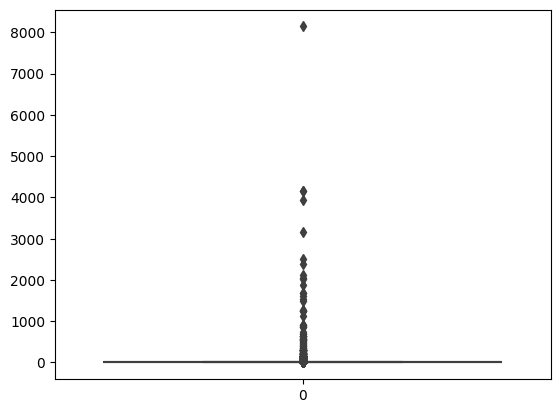

In [26]:
# observing the distribution of unit price
sns.boxplot(df_n.UnitPrice)
plt.show()

In [27]:
dfFree = df_n[df_n.UnitPrice == 0]
dfFree.head()

,InvoiceNo,InvoiceDate,StockCode,Description,Quantity,UnitPrice,AmountSpent,CustomerID,Country,month_year
9302,537197,2010-12-05 14:02:00,22841,round cake tin vintage green,1,0.00,0.00,12647,Germany,2010-12
33576,539263,2010-12-16 14:36:00,22580,advent calendar gingham sack,4,0.00,0.00,16560,United Kingdom,2010-12
40089,539722,2010-12-21 13:45:00,22423,regency cakestand 3 tier,10,0.00,0.00,14911,EIRE,2010-12
47068,540372,2011-01-06 16:41:00,22090,paper bunting retrospot,24,0.00,0.00,13081,United Kingdom,2011-01
47070,540372,2011-01-06 16:41:00,22553,plasters in tin skulls,24,0.00,0.00,13081,United Kingdom,2011-01


In [28]:
dfFree.month_year.value_counts().sort_index()

2010-12     3
2011-01     3
2011-02     1
2011-03     2
2011-04     2
2011-05     2
2011-07     2
2011-08     6
2011-09     2
2011-10     3
2011-11    14
Freq: M, Name: month_year, dtype: int64

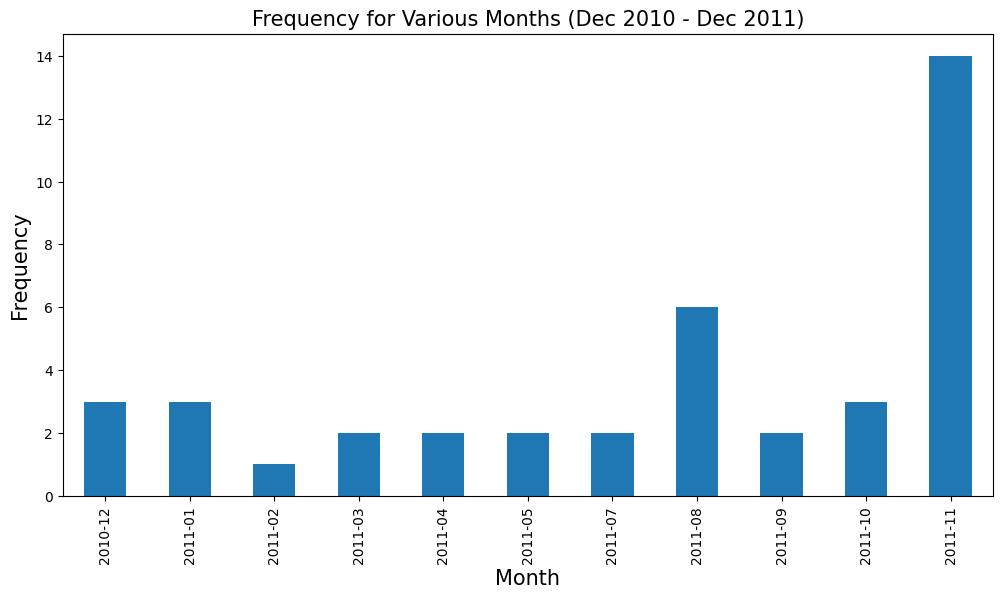

In [29]:
ax = dfFree.month_year.value_counts().sort_index().plot(kind='bar',figsize=(12,6), color=color[0])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for Various Months (Dec 2010 - Dec 2011)',fontsize=15)
plt.show()

It is not specified what criteria the company uses to determine which customers receive free items. The company distributed free items to customers on average 2-4 times per month, except for June 2011.

### Findout patterns for each country

**No. orders for each country?**

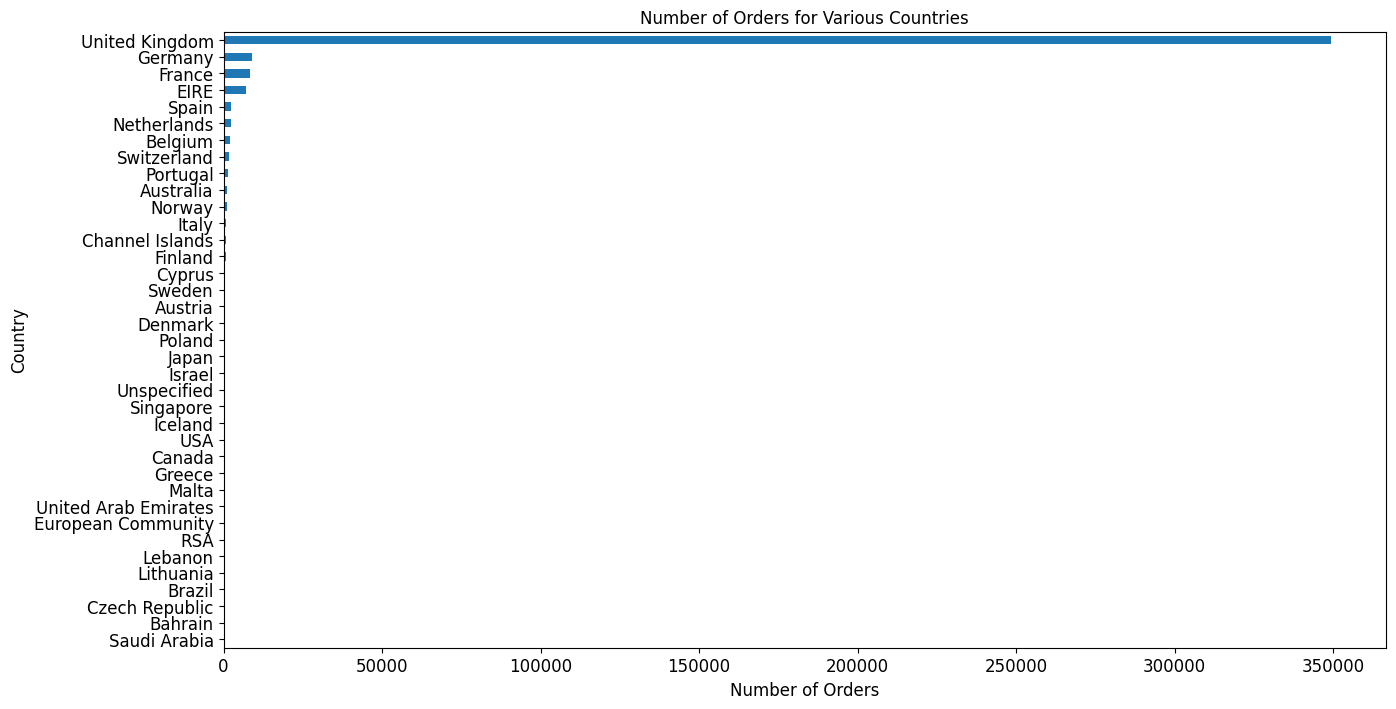

In [30]:
gp_cntry_orders = df_n.groupby('Country')['InvoiceNo'].count().sort_values()


# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
gp_cntry_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for Various Countries', fontsize=12)
plt.show()

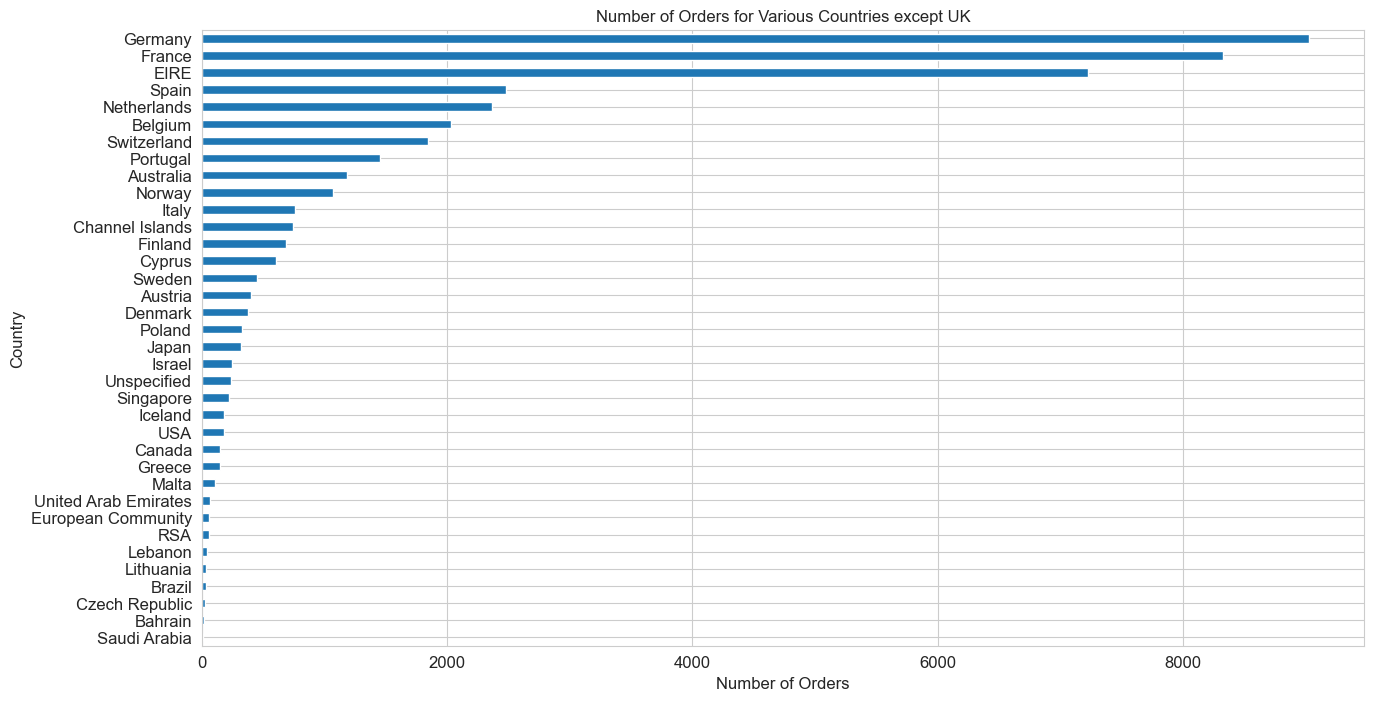

In [73]:
gp_cntry_orders = df_n.groupby('Country')['InvoiceNo'].count().sort_values()
del gp_cntry_orders['United Kingdom']

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
gp_cntry_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for Various Countries except UK', fontsize=12)
plt.show()

**Amount of money spent by each country?**

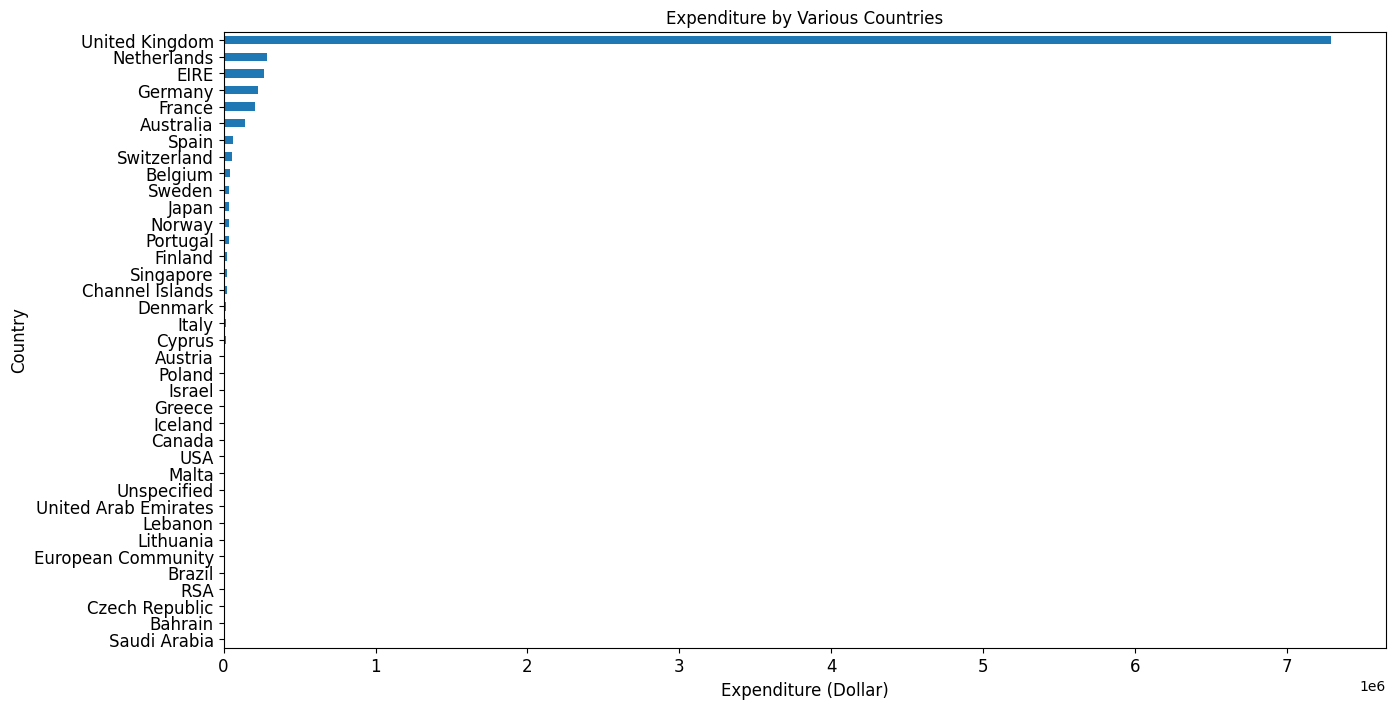

In [31]:
gp_ctry_amnt_spnt = df_n.groupby('Country')['AmountSpent'].sum().sort_values()
# del group_country_orders['United Kingdom']


plt.subplots(figsize=(15,8))
gp_ctry_amnt_spnt.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Expenditure (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Expenditure by Various Countries', fontsize=12)
plt.show()

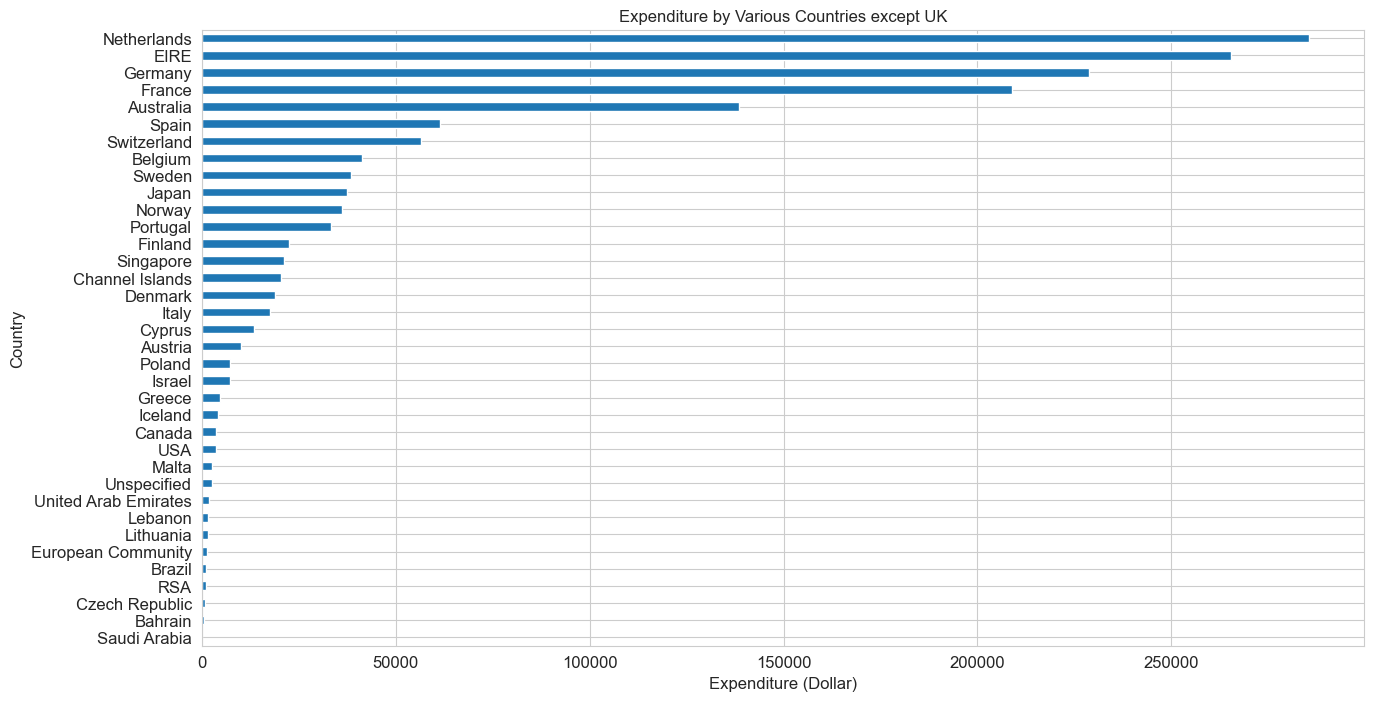

In [72]:
gp_ctry_amnt_spnt = df_n.groupby('Country')['AmountSpent'].sum().sort_values()
del gp_ctry_amnt_spnt['United Kingdom']


plt.subplots(figsize=(15,8))
gp_ctry_amnt_spnt.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Expenditure (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Expenditure by Various Countries except UK', fontsize=12)
plt.show()

# Conclusion

**Strengths**: 
- The company receives a high number of orders from customers in the UK, indicating a strong market presence in this country.
- The company has a high number of orders during weekdays, specifically at 12:00pm, which can be leveraged for targeted marketing and promotions.

**Limitations**: 
- The company does not have a significant presence in markets outside of the UK, Germany, France, Ireland, and Spain.
- The data is limited and does not provide information on the lowest-selling month and the reason for no transaction on Saturdays.
- The data does not specify what factors contribute to giving out the free items, and it's unclear if it's an effective strategy.

**Insights**: 
- The Netherlands is a market with high potential for revenue growth.
- The company's customer base may consist of working professionals who make purchases during their lunch break.

**Data-driven recommendations**: 
- Expand marketing efforts to target customers in the Netherlands.
- Consider offering promotions or discounts during lunchtime hours to increase sales.
- Investigate the reason for no transactions on Saturdays and consider strategies to increase sales on this day.
- Further analyze the data to understand the factors that contribute to giving out the free items and evaluate the effectiveness of this strategy.